In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
import math
import sympy
import pandas as pd

Try to consider the situation where we do not know the initial state $X_0$ and we want to find the credibility of $P(X_{1} \in (a,b))$ where state space $\mathcal{X} = \mathbb{R} $. <br>
There are 3 types of uncertainty that we are interested in and the credibility of event can be described as following: <br>
1. rv-rv case <br>
\begin{equation*}
\begin{split}
P(X_{1} \in (a,b))
={}& \underset{(a,b)}{\int} \underset{\mathbb{R}}{\int} p(x_{0},x_{1}) dx_{0}dx_{1} \\
={}& \underset{(a,b)}{\int} \underset{\mathbb{R}}{\int} p(x_{0})p(x_{1}|x_{0}) dx_{0}dx_{1} \\
={}& \underset{(a,b)}{\int} \underset{\mathbb{R}}{\int} N(x_{0};\mu_{0},\sigma_{0}^{2})N(x_{1};x_{0}, \sigma^2) dx_{0}dx_{1} \\
={}& \underset{(a,b)}{\int} N(x_{1};\mu_{0},\sigma_{0}^{2}+\sigma^2)dx_{1} \\
={}& F(b)-F(a)
\end{split} 
\end{equation*}
where $F(x_{1})$ is cumulative function of normal distribution $N(x_{1};\mu{0},\sigma_{0}^{2}+\sigma^2).$
2. duv-duv case <br>
\begin{equation*}
\begin{split}
\overline{P}(X_{1} \in (a,b))
={}& \underset{x_{0} \in \mathbb{R}}{sup}f(x_{0}) \underset{x_{1} \in (a,b)}{sup} f(x_{1}|x_{0}) \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \underset{x_{1} \in (a,b)}{sup}\overline{N}(x_{1};x_{0}, \sigma^2)  \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \underset{x_{1} \in (a,b)}{sup} \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \overline{N}(x_{1};x_{0}, \sigma^2)  \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \underset{x_{1} \in (a,b)}{sup} \exp(\frac{-(x_{0}-\mu_{0})^2}{2\sigma_{0}^2}) \exp(\frac{-(x_{1}-x_{0})^2}{2\sigma^2})  \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \underset{x_{1} \in (a,b)}{sup} \exp(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2}). 
\end{split} 
\end{equation*}
3. duv-rv case <br>
\begin{equation*}
\begin{split}
P(X_{1} \in (a,b))
={}& \underset{x_{0} \in \mathbb{R}}{sup}f(x_{0}) \underset{(a,b)}{\int} p(x_{1}|x_{0}) dx_{1} \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \underset{(a,b)}{\int}N(x_{1};x_{0}, \sigma^2)dx_{1}   \\
={}& \underset{x_{0} \in \mathbb{R}}{sup}  [\overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \cdot (F(b)-F(a))]
\end{split} 
\end{equation*}
where $F(x_{1})$ is cumulative function of normal distribution $N(x_{1};x_{0}, \sigma^2) .$

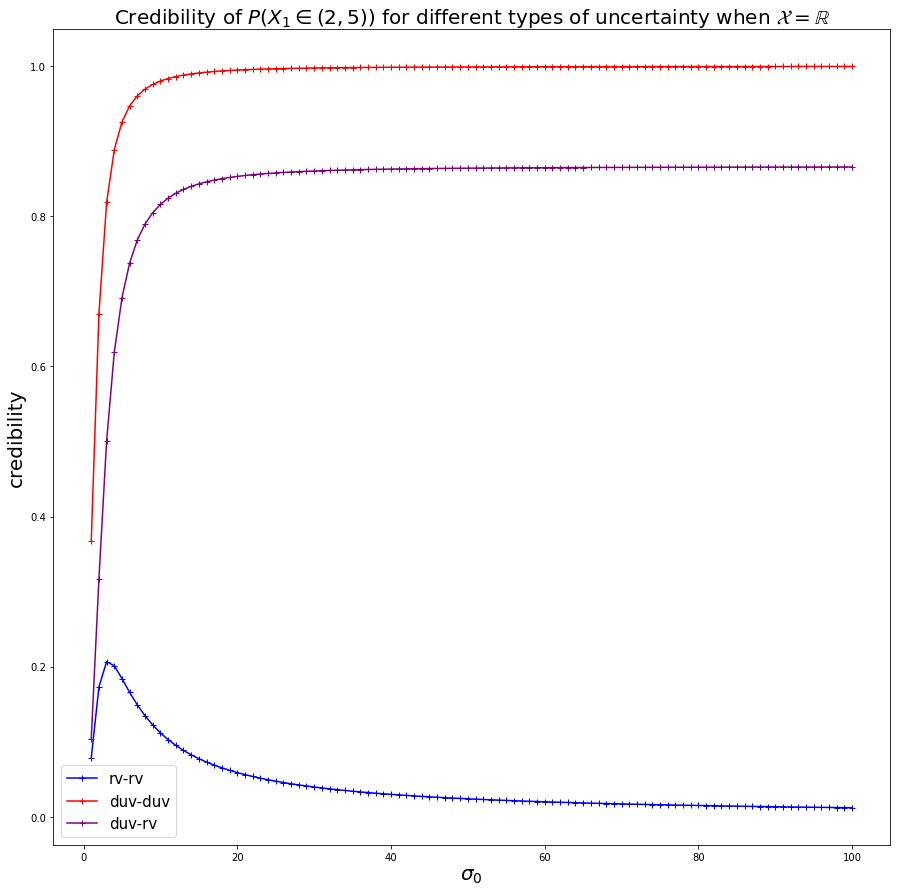

In [16]:
a= 2
b= 5
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

A = [] #maximum argument
B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    def f(x):
        return math.exp((-1/(2*i**2*sig**2))*((sig*x[0] - sig*mean0)**2 +(i*x[1] - i*x[0])**2))
    j = minimize(lambda x: -f(x),np.array([0,(a+b)/2]), bounds=[(None,None),(a,b)]).x
    A.append(j)
    B.append(f(j))  

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),0).x   #try9.4 for best guess of duv-rv from sigma=100 #try to find how to set initial guess?
    C.append(j)
    D.append(f(j))  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (2,5))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,marker='+',linestyle='-',color='blue',label='rv-rv')
plt.plot(np.arange(start=begin, stop=end, step=1),B,marker='+',linestyle='-',color='red',label='duv-duv')
plt.plot(np.arange(start=begin, stop=end, step=1),D,marker='+',linestyle='-',color='purple',label='duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


It can be seen that both of the case that use duv to describe the uncertainty of initial state give more the credibility compared to rv-rv case for every $\sigma_0$. Moreover, if $\sigma_0$ increases, the credibility of rv-rv uncertainty is lower while the credibility of duv-duv and duv-rv uncertainty is higher. For the latter case, this is reasonable becuase when we are not sure bout initial state ($\sigma_0$) is high, it means that we cannot be sure about the state of $X_1$. Thus, there is the possibility that the state of $X_1$ can be anything which implies the that the credibility is high.

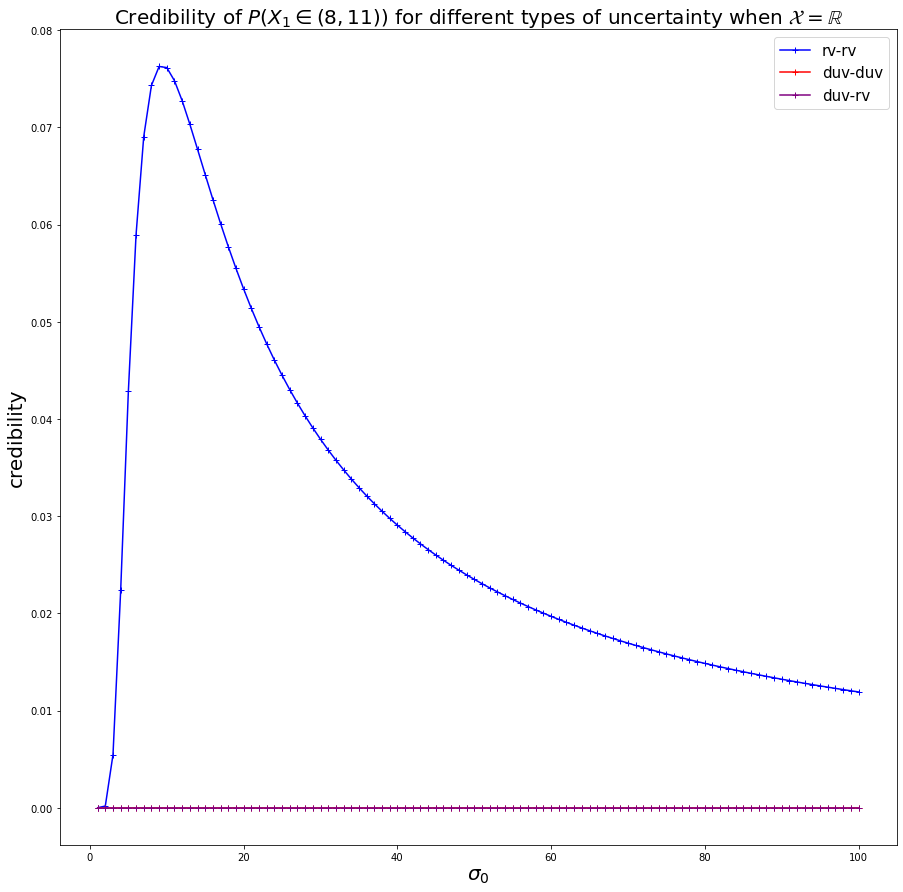

In [17]:
a= 8
b= 11
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

A = [] #maximum argument
B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    def f(x):
        return math.exp((-1/(2*i**2*sig**2))*((sig*x[0] - sig*mean0)**2 +(i*x[1] - i*x[0])**2))
    j = minimize(lambda x: -f(x),np.array([0,(a+b)/2]), bounds=[(None,None),(a,b)]).x
    A.append(j)
    B.append(f(j))  

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),0).x   #try9.4 for best guess of duv-rv from sigma=100 #try to find how to set initial guess?
    C.append(j)
    D.append(f(j))  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (8,11))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,marker='+',linestyle='-',color='blue',label='rv-rv')
plt.plot(np.arange(start=begin, stop=end, step=1),B,marker='+',linestyle='-',color='red',label='duv-duv')
plt.plot(np.arange(start=begin, stop=end, step=1),D,marker='+',linestyle='-',color='purple',label='duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


However, when we change the event to be $X_1 \in (8,11)$, the credibility of both duv-duv and duv-rv case is almost zero!!! and it is lower than rv-rv case which is not sensible.

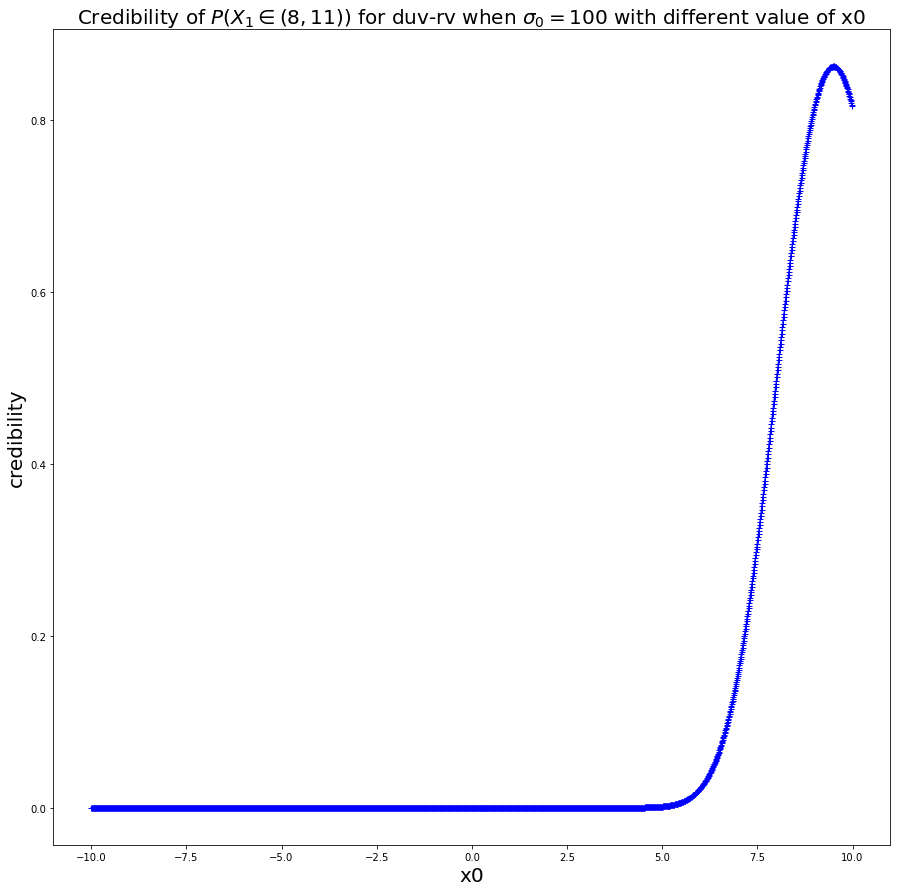

In [18]:
#for testing duv-rv case
Z = []
for i in np.arange(-10,10,0.01):
    Z.append((math.exp((-1/(2*10000))*((i-mean0)**2 )))* (norm(i, sig).cdf(b) - norm(i, sig).cdf(a)))
plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (8,11))$ for duv-rv when $\sigma_{0} = 100$ with different value of x0", fontsize = 20)
plt.xlabel('x0',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=-10, stop=10, step=0.01),Z,marker='+',linestyle='-',color='blue',label='rv-rv')    
    

But after we examine at credibility of $P(X_1 \in (8,11))$ for duv-rv when $\sigma_{0} = 100$ with different value of x0, it can be seen that the slope around our initial guess (0) to find maximum point cannot go to anypoint. 
In the end, we will get the supremum argument to be the same vlue as our initial guess. This is the reason why we get low credibility for both duv-duv and duv-rv case. This problem can be fixed by trying to find the appropriate initila guess(the one with steep slope).   

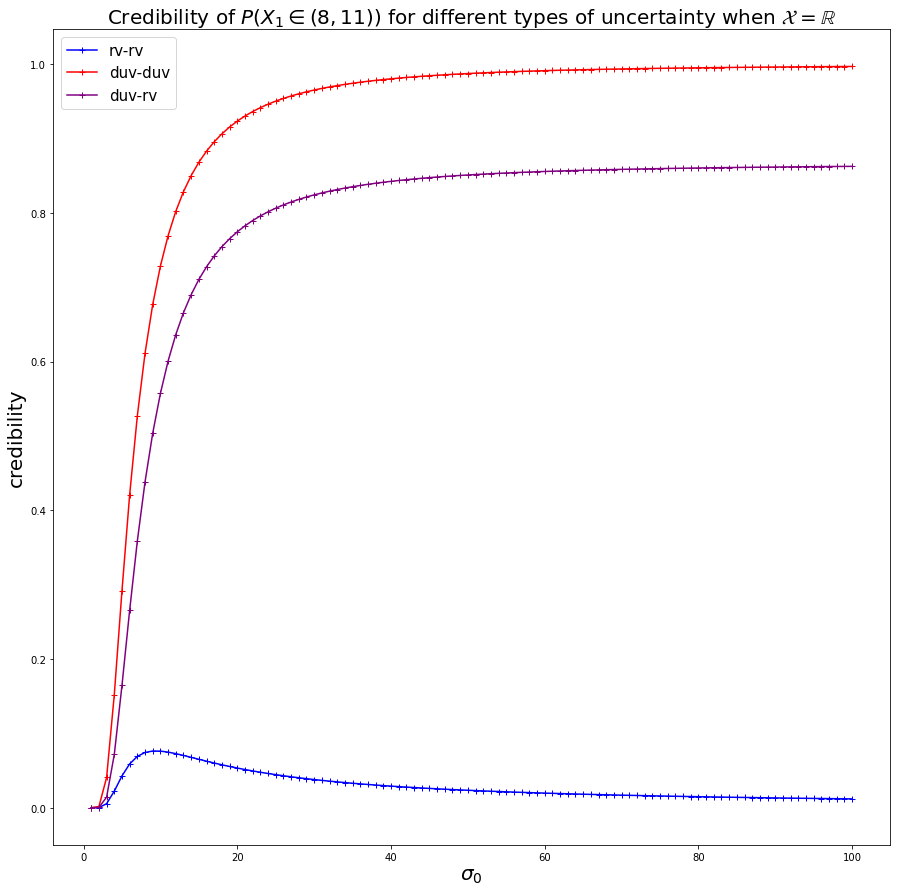

In [19]:
a= 8
b= 11
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

A = [] #maximum argument
B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    def f(x):
        return math.exp((-1/(2*i**2*sig**2))*((sig*x[0] - sig*mean0)**2 +(i*x[1] - i*x[0])**2))
    j = minimize(lambda x: -f(x),np.array([a,a]), bounds=[(None,None),(a,b)]).x
    A.append(j)
    B.append(f(j))  

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),a).x   #try to find how to set initial guess?
    C.append(j)
    D.append(f(j))  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (8,11))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,marker='+',linestyle='-',color='blue',label='rv-rv')
plt.plot(np.arange(start=begin, stop=end, step=1),B,marker='+',linestyle='-',color='red',label='duv-duv')
plt.plot(np.arange(start=begin, stop=end, step=1),D,marker='+',linestyle='-',color='purple',label='duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


After we change initial guess of duv-rv case of every $\sigma_{0}$ to be 9.4, the correct credibility of duv-rv case is recovered. It is worth noting that we should try to find the method of giving the appropriate initial guess for different $\sigma_{0}$ if we want to use scipy.optimize.minimize function. Otherwise, we need to use method for finding critical point which is in interval of our event.

## method of finding credibility of duv-dv case
First, we will try to find the marginal possibility function describing $X_1$. <br>
Consider
\begin{equation*}
\begin{split}
f(x_1)
={}& \underset{x_{0} \in \mathbb{R}}{sup} f(x_0,x_1) \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} f(x_0)f(x_1|x_0) \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \overline{N}(x_{1};x_{0}, \sigma^2)  \\
={}& \underset{x_{0} \in \mathbb{R}}{sup} \exp(\frac{-(x_{0}-\mu_{0})^2}{2\sigma_{0}^2}) \exp(\frac{-(x_{1}-x_{0})^2}{2\sigma^2})  \\
={}& \underset{x_{0} \in \mathbb{R}}{sup}  \exp(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2}). 
\end{split} 
\end{equation*}
Since we want to find supremum, we need to find $x_0$ satisfying $\frac{\partial }{\partial x_0} g(x_0) = 0$ where $g(x_0) = \exp(\frac{-(x_{0}-\mu_{0})^2}{2\sigma_{0}^2}) \exp(\frac{-(x_{1}-x_{0})^2}{2\sigma^2}) $.
\begin{equation*}
\begin{split}
\frac{\partial }{\partial x_0} g(x_0)
={}& 0 \\
\exp(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2})
\frac{\partial }{\partial x_0}(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2})
={}& 0 \\
\frac{\partial }{\partial x_0}(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2})
={}& 0 \\
\frac{-1}{2\sigma_{0}^2\sigma^2}
\frac{\partial }{\partial x_0}[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]
={}& 0 \\
\frac{\partial }{\partial x_0}[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]
={}& 0 \\
2(\sigma x_{0}-\sigma \mu_{0})(\sigma) + 2(\sigma_{0} x_{1}-\sigma_{0} x_{0})(-\sigma_{0})
={}& 0 \\
(\sigma^2 x_{0}-\sigma^2 \mu_{0}) + (-\sigma_{0}^2 x_{1}+\sigma_{0}^2 x_{0})
={}& 0 \\
\sigma^2 x_{0} +\sigma_{0}^2 x_{0}
={}& \sigma^2 \mu_{0} + \sigma_{0}^2 x_{1}\\
x_0
={}& \frac{\sigma^2 \mu_{0} + \sigma_{0}^2 x_{1}}{\sigma^2 + \sigma_{0}^2}
\end{split} 
\end{equation*}
After that, we substitute this back in $g(x_0)$ to find $f(x_1)$
\begin{equation*}
\begin{split}
f(x_1)
={}& \underset{x_{0} \in \mathbb{R}}{sup}  \exp(\frac{-[(\sigma x_{0}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0} x_{0})^2]}{2\sigma_{0}^2\sigma^2})\\
={}& \exp(\frac{-[(\sigma (\frac{\sigma^2 \mu_{0} + \sigma_{0}^2 x_{1}}{\sigma^2 + \sigma_{0}^2})-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-\sigma_{0}(\frac{\sigma^2 \mu_{0} + \sigma_{0}^2 x_{1}}{\sigma^2 + \sigma_{0}^2}))^2]}{2\sigma_{0}^2\sigma^2}) \\
={}& \exp(\frac{-[(\frac{\sigma^3 \mu_{0} + \sigma\sigma_{0}^2 x_{1}}{\sigma^2 + \sigma_{0}^2}-\sigma \mu_{0})^2 + (\sigma_{0} x_{1}-(\frac{\sigma^2\sigma_{0} \mu_{0} + \sigma_{0}^3 x_{1}}{\sigma^2 + \sigma_{0}^2}))^2]}{2\sigma_{0}^2\sigma^2}) \\
={}& \exp(\frac{-[(\frac{\sigma\sigma_{0}^2 x_{1} - \sigma\sigma_{0}^2 \mu_{0}}{\sigma^2 + \sigma_{0}^2})^2 + (\frac{\sigma^2\sigma_{0} x_{1} - \sigma^2\sigma_{0} \mu_{0}}{\sigma^2 + \sigma_{0}^2})^2]}{2\sigma_{0}^2\sigma^2}) \\
={}& \exp(\frac{-[(\frac{\sigma_{0} x_{1} - \sigma_{0} \mu_{0}}{\sigma^2 + \sigma_{0}^2})^2 + (\frac{\sigma x_{1} - \sigma \mu_{0}}{\sigma^2 + \sigma_{0}^2})^2]}{2}) \\
={}& \exp(\frac{-[(\sigma_{0} x_{1} - \sigma_{0} \mu_{0})^2 + (\sigma x_{1} - \sigma \mu_{0})^2]}{2(\sigma^2 + \sigma_{0}^2)^{2}}) \\
={}& \exp(\frac{-[(\sigma_{0}^2)(x_{1} - \mu_{0})^2 + (\sigma^{2})(x_{1} - \mu_{0})^2]}{2(\sigma^2 + \sigma_{0}^2)^2}) \\
={}& \exp(\frac{-[(\sigma^{2}+\sigma_{0}^2)(x_{1} - \mu_{0})^2] }{2(\sigma^2 + \sigma_{0}^2)^2}) \\
={}& \exp(\frac{-(x_{1} - \mu_{0})^2 }{2(\sigma^2 + \sigma_{0}^2)}) \\
={}& \overline{N}(x_{1};\mu_{0},\sigma^2 + \sigma_{0}^2). 
\end{split} 
\end{equation*}

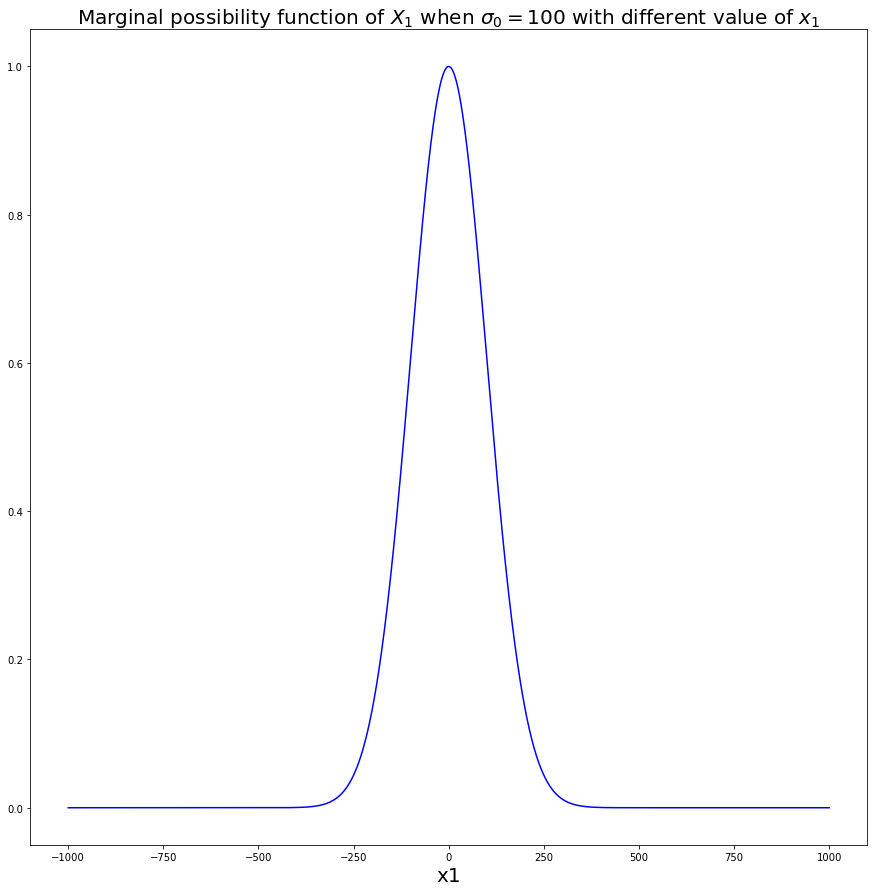

In [20]:
# duv-duv case #marginal possibility function of X_1
Z = []
for i in np.arange(mean0-1000,mean0+1000,0.01):
    Z.append(math.exp((-1/(2*(sig**2+10000))*((i-mean0)**2 ))))
plt.figure(figsize=(15,15))
plt.title("Marginal possibility function of $X_1$ when $\sigma_{0} = 100$ with different value of $x_{1}$", fontsize = 20)
plt.xlabel('x1',fontsize=20)
#plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=mean0-1000, stop=mean0+1000, step=0.01),Z,linestyle='-',color='blue')    
    

It can be seen that the shape of marginal possibility function of $X_{1}$ is symmetry and is centered around $\mu_{0}$. This result can make us calculate the credibility of duv-duv case more easier. <br>
We recall that  $\overline{P}(X_{1} \in (a,b)) = \underset{x_{1} \in (a,b)}{sup} f(x_1) = \underset{x_{1} \in (a,b)}{sup} \overline{N}(x_{1};\mu_{0},\sigma^2 + \sigma_{0}^2).$ <br>
Credibility can be considered into 3 cases; <br>
case 1: $a < b < \mu_{0}$ <br>
$$\overline{P}(X_{1} \in (a,b)) = f(b) =  \overline{N}(b;\mu_{0},\sigma^2 + \sigma_{0}^2) $$
case 2: $a \leq \mu_{0} \leq b $ <br>
$$\overline{P}(X_{1} \in (a,b)) = 1 $$
case 1: $\mu_{0} <a <b$ <br>
$$\overline{P}(X_{1} \in (a,b)) = f(a) =  \overline{N}(a;\mu_{0},\sigma^2 + \sigma_{0}^2) $$

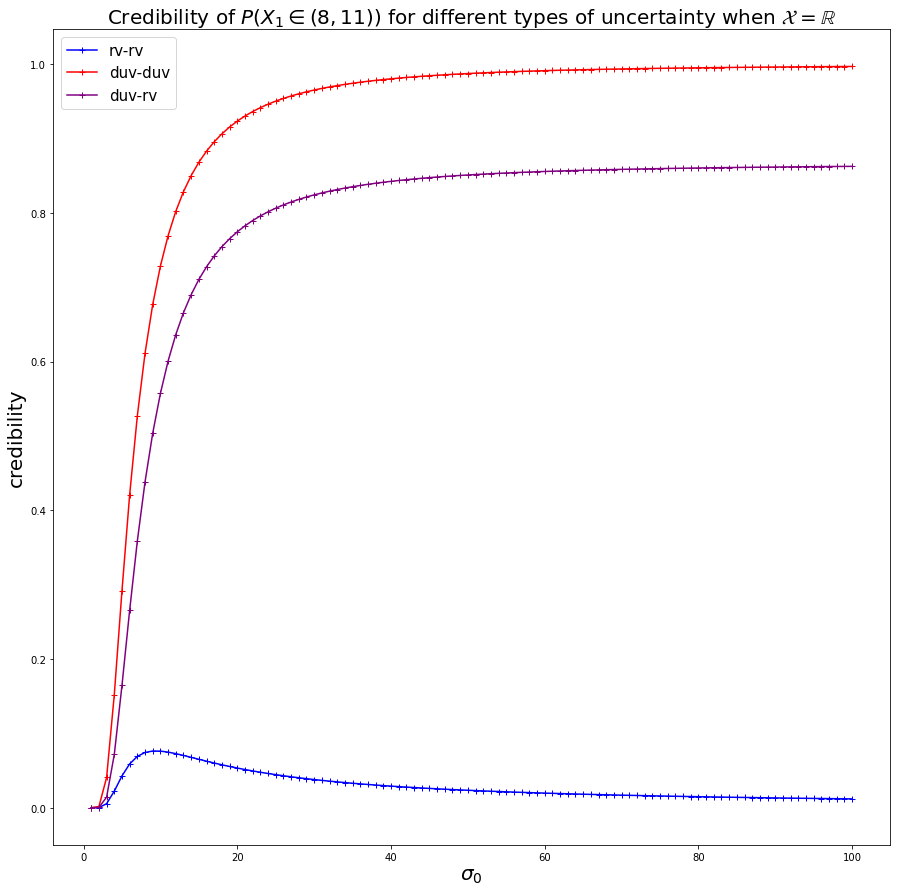

In [21]:
a= 8
b= 11
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    if a <= mean0 <= b:
        B.append(1)
    elif mean0 < a:
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((a-mean0)**2 ))) #f(a)
    else :
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((b-mean0)**2 ))) #f(b)

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),a).x   #try to find how to set initial guess?
    C.append(j)
    D.append(f(j))  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (8,11))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,marker='+',linestyle='-',color='blue',label='rv-rv')
plt.plot(np.arange(start=begin, stop=end, step=1),B,marker='+',linestyle='-',color='red',label='duv-duv')
plt.plot(np.arange(start=begin, stop=end, step=1),D,marker='+',linestyle='-',color='purple',label='duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


# Lower bound of credibility
The lower bound of for credibility of event $X_1 \in (a,b)$ can be calculated as following : <br>
## 1. duv-duv case <br>
\begin{equation*}
\begin{split}
1 - \overline{P}(X_{1} \in (a,b)^c)
={}& 1 - \underset{x_{1} \in (a,b)^c}{sup}f(x_{1}). 
\end{split} 
\end{equation*}
Credibility can be considered into 3 cases; <br>
### case 1.1: $a < b < \mu_{0}$ <br>
\begin{equation*}
\begin{split}
1 - \overline{P}(X_{1} \in (a,b)^c)
={}& 1 - \underset{x_{1} \in (a,b)^c}{sup}f(x_{1}) \\
={}& 1 - f(\mu_{0}) \\
={}& 1 - 1 \\
={}& 0.
\end{split} 
\end{equation*}
### case 1.2: $a \leq \mu_{0} \leq b $ <br>
### case 1.2.1: $|a - \mu_0| \leq |b- \mu_0|$ <br>
\begin{equation*}
\begin{split}
1 - \overline{P}(X_{1} \in (a,b)^c)
={}& 1 - \underset{x_{1} \in (a,b)^c}{sup}f(x_{1}) \\
={}& 1 - f(a).
\end{split} 
\end{equation*}
### case 1.2.2: $|a - \mu_0| > |b- \mu_0| $ <br>
\begin{equation*}
\begin{split}
1 - \overline{P}(X_{1} \in (a,b)^c)
={}& 1 - \underset{x_{1} \in (a,b)^c}{sup}f(x_{1}) \\
={}& 1 - f(b).
\end{split} 
\end{equation*}
### case 1.3: $\mu_{0} <a <b$ <br>
\begin{equation*}
\begin{split}
1 - \overline{P}(X_{1} \in (a,b)^c)
={}& 1 - \underset{x_{1} \in (a,b)^c}{sup}f(x_{1}) \\
={}& 1 - f(\mu_{0}) \\
={}& 1 - 1 \\
={}& 0.
\end{split} 
\end{equation*}
## 2. duv-rv case <br>
\begin{equation*}
\begin{split}
1-P(X_{1} \in (a,b)^c)
={}& 1- [ \underset{x_{0} \in \mathbb{R}}{sup}f(x_{0}) \underset{(a,b)^c}{\int} p(x_{1}|x_{0}) dx_{1} ]\\
={}& 1- [ \underset{x_{0} \in \mathbb{R}}{sup}f(x_{0}) \cdot (\underset{(-\infty,\infty)}{\int} p(x_{1}|x_{0}) dx_{1} -  \underset{(a,b)}{\int} p(x_{1}|x_{0}) dx_{1}) ]\\
={}& 1- [ \underset{x_{0} \in \mathbb{R}}{sup}f(x_{0}) \cdot (1 -  \underset{(a,b)}{\int} p(x_{1}|x_{0}) dx_{1}) ]\\
={}& 1- [\underset{x_{0} \in \mathbb{R}}{sup} \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \cdot (1 - \underset{(a,b)}{\int}N(x_{1};x_{0}, \sigma^2)dx_{1} )]  \\
={}& 1-[\underset{x_{0} \in \mathbb{R}}{sup}  [\overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \cdot (1- (F(b)-F(a)))]] \\
={}& 1-[\underset{x_{0} \in \mathbb{R}}{sup}  [\overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \cdot (1- F(b)+F(a))]] \\
={}& \underset{x_{0} \in \mathbb{R}}{inf} ( 1-[ \overline{N}(x_{0};\mu_{0},\sigma_{0}^{2}) \cdot (1- F(b)+F(a))] )
\end{split} 
\end{equation*}
where $F(x_{1})$ is cumulative function of normal distribution $N(x_{1};x_{0}, \sigma^2) .$

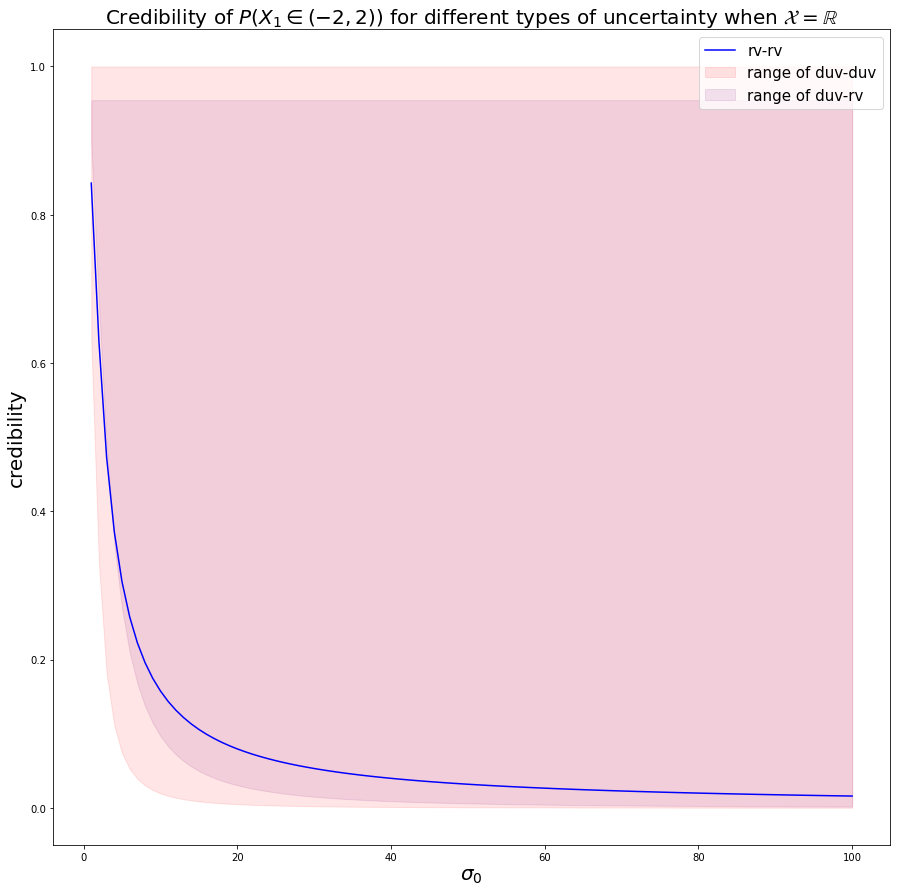

In [22]:
a= -2
b= 2
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    if a <= mean0 <= b:
        B.append(1)
    elif mean0 < a:
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((a-mean0)**2 ))) #f(a)
    else :
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((b-mean0)**2 ))) #f(b)
        
X = [] #lower bound for credibility duv-duv case
for i in np.arange(begin,end):
    if a <= mean0 <= b:
        if abs(a-mean0) <= abs(b-mean0):
            X.append(1-(math.exp((-1/(2*(i**2+sig**2)))*((a-mean0)**2 )))) #1-f(a)
        else :
            X.append(1-(math.exp((-1/(2*(i**2+sig**2)))*((b-mean0)**2 )))) #1-f(b)
    elif mean0 < a:
        X.append(0) #1-f(mean0)
    else :
        X.append(0) #1-f(mean0)

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),a).x   #try to find how to set initial guess? #set intial guess =a
    C.append(j)
    D.append(f(j)[0])  
    
Y = [] #lower bound for credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return 1- ((math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (1 - norm(x, sig).cdf(b) + norm(x, sig).cdf(a)))
    j = minimize(f,a).x   #try to find how to set initial guess? #set intial guess =a if set a+b/2 will stuck at local min
    Y.append(f(j)[0])  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (-2,2))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,linestyle='-',color='blue',label='rv-rv')
#plt.plot(np.arange(start=begin, stop=end, step=1),B,linestyle='-',color='red',label='duv-duv')
#plt.plot(np.arange(start=begin, stop=end, step=1),X,linestyle='--',color='red',label='lower bound duv-duv')
#plt.plot(np.arange(start=begin, stop=end, step=1),D,linestyle='-',color='purple',label='duv-rv')
#plt.plot(np.arange(start=begin, stop=end, step=1),Y,linestyle='--',color='purple',label='lower bound duv-rv')
plt.fill_between(np.arange(start=begin, stop=end, step=1),B,X, color='red', alpha=0.1,label='range of duv-duv')
plt.fill_between(np.arange(start=begin, stop=end, step=1),D,Y, color='purple', alpha=0.1,label='range of duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


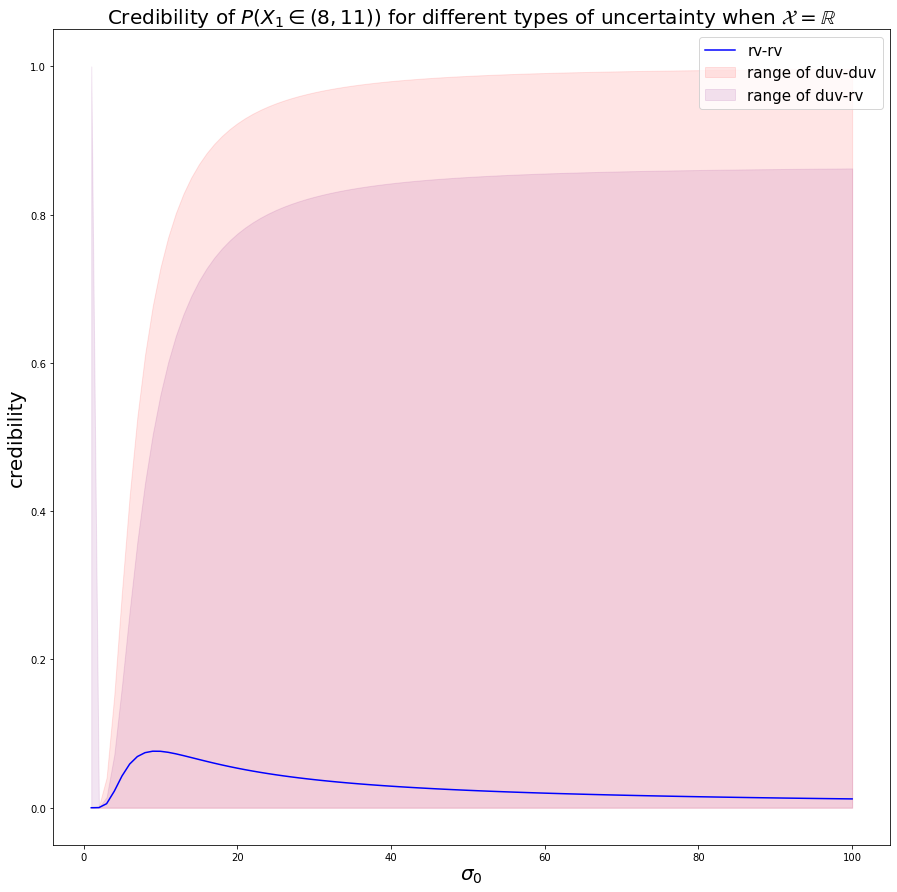

In [23]:
a= 8
b= 11
begin = 1
end = 101
sig0 = np.arange(begin,end) #sigma from 1-100
sig = 1
mean0 = 0 

cred = norm(mean0, (sig0**2 + sig**2)**0.5).cdf(b) - norm(mean0, (sig0**2 + sig**2)**0.5).cdf(a) #rv-rv case

B = [] #maxumum value of function = credibility duv-duv case
for i in np.arange(begin,end):
    if a <= mean0 <= b:
        B.append(1)
    elif mean0 < a:
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((a-mean0)**2 ))) #f(a)
    else :
        B.append(math.exp((-1/(2*(i**2+sig**2)))*((b-mean0)**2 ))) #f(b)
        
X = [] #lower bound for credibility duv-duv case
for i in np.arange(begin,end):
    if a <= mean0 <= b:
        if abs(a-mean0) <= abs(b-mean0):
            X.append(1-(math.exp((-1/(2*(i**2+sig**2)))*((a-mean0)**2 )))) #1-f(a)
        else :
            X.append(1-(math.exp((-1/(2*(i**2+sig**2)))*((b-mean0)**2 )))) #1-f(b)
    elif mean0 < a:
        X.append(0) #1-f(mean0)
    else :
        X.append(0) #1-f(mean0)

C = [] #maximum argument
D = [] #maxumum value of function = credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return (math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (norm(x, sig).cdf(b) - norm(x, sig).cdf(a))
    j = minimize(lambda x: -f(x),a).x   #try to find how to set initial guess?
    C.append(j)
    D.append(f(j)[0])  
    
Y = [] #lower bound for credibility duv-rv case
for i in np.arange(begin,end):
    def f(x):
        return 1- ((math.exp((-1/(2*i**2))*((x-mean0)**2 )))* (1 - norm(x, sig).cdf(b) + norm(x, sig).cdf(a)))
    j = minimize(f,a).x   #try to find how to set initial guess?
    Y.append(f(j)[0])  


plt.figure(figsize=(15,15))
plt.title("Credibility of $P(X_1 \in (8,11))$ for different types of uncertainty when $\mathcal{X} = \mathbb{R}$", fontsize = 20)
plt.xlabel(r'$\sigma_0$',fontsize=20)
plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=begin, stop=end, step=1),cred,linestyle='-',color='blue',label='rv-rv')
#plt.plot(np.arange(start=begin, stop=end, step=1),B,linestyle='-',color='red',label='duv-duv')
#plt.plot(np.arange(start=begin, stop=end, step=1),X,linestyle='--',color='red',label='lower bound duv-duv')
#plt.plot(np.arange(start=begin, stop=end, step=1),D,linestyle='-',color='purple',label='duv-rv')
#plt.plot(np.arange(start=begin, stop=end, step=1),Y,linestyle='--',color='purple',label='lower bound duv-rv')
plt.fill_between(np.arange(start=begin, stop=end, step=1),B,X, color='red', alpha=0.1,label='range of duv-duv')
plt.fill_between(np.arange(start=begin, stop=end, step=1),D,Y, color='purple', alpha=0.1,label='range of duv-rv')
plt.legend(loc='best',fontsize=15)
plt.show()


Note : result of lower bound of duv-rv when $\sigma_0$ seems weird because of not proper initial guess

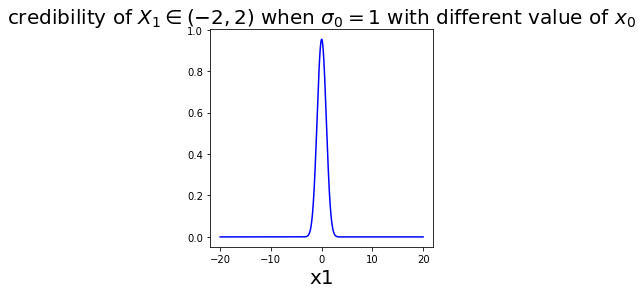

In [24]:
# credibility of duv-rv when sigma0 =1
a= -2 
b= 2
Z = []
for i in np.arange(mean0-20,mean0+20,0.01):
    Z.append((math.exp((-1/(2*1**2))*((i-mean0)**2 )))* (norm(i, sig).cdf(b) - norm(i, sig).cdf(a)))
plt.figure(figsize=(4,4))
plt.title("credibility of $X_1 \in (-2,2)$ when $\sigma_{0} = 1$ with different value of $x_{0}$", fontsize = 20)
plt.xlabel('x1',fontsize=20)
#plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=mean0-20, stop=mean0+20, step=0.01),Z,linestyle='-',color='blue')    

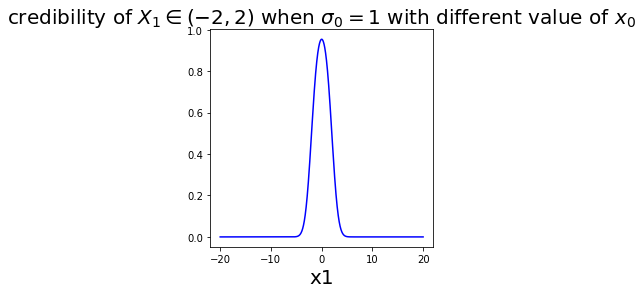

In [25]:
# credibility of duv-rv when sigma0 =100
a= -2 
b= 2
Z = []
for i in np.arange(mean0-20,mean0+20,0.01):
    Z.append((math.exp((-1/(2*100**2))*((i-mean0)**2 )))* (norm(i, sig).cdf(b) - norm(i, sig).cdf(a)))
plt.figure(figsize=(4,4))
plt.title("credibility of $X_1 \in (-2,2)$ when $\sigma_{0} = 1$ with different value of $x_{0}$", fontsize = 20)
plt.xlabel('x1',fontsize=20)
#plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=mean0-20, stop=mean0+20, step=0.01),Z,linestyle='-',color='blue')    

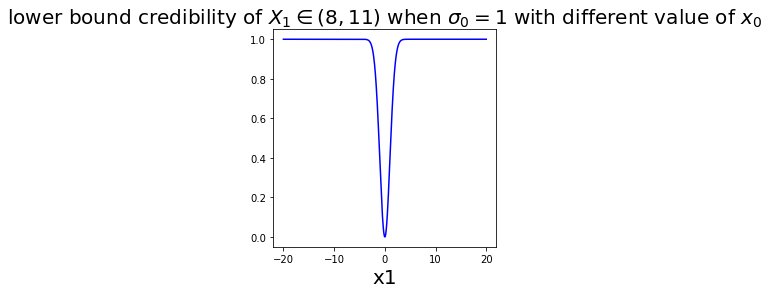

In [26]:
# lower bound credibility of duv-rv when sigma0 =1
a= 8
b= 11
Z = []
for i in np.arange(mean0-20,mean0+20,0.01):
    Z.append(1-((math.exp((-1/(2*1**2))*((i-mean0)**2 )))* (1-norm(i, sig).cdf(b) + norm(i, sig).cdf(a))))
plt.figure(figsize=(4,4))
plt.title("lower bound credibility of $X_1 \in (8,11)$ when $\sigma_{0} = 1$ with different value of $x_{0}$", fontsize = 20)
plt.xlabel('x1',fontsize=20)
#plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=mean0-20, stop=mean0+20, step=0.01),Z,linestyle='-',color='blue')    

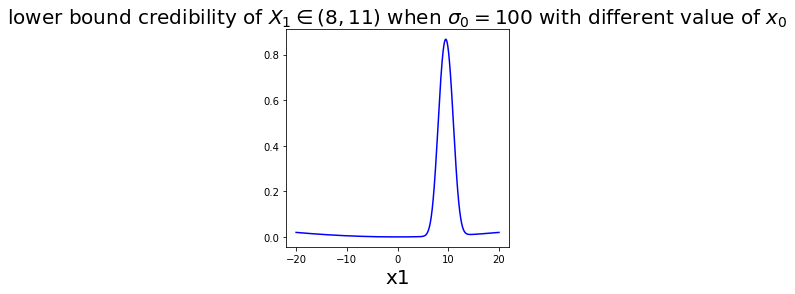

In [27]:
# lower bound credibility of duv-rv when sigma0 =1
a= 8
b= 11
Z = []
for i in np.arange(mean0-20,mean0+20,0.01):
    Z.append(1-((math.exp((-1/(2*100**2))*((i-mean0)**2 )))* (1-norm(i, sig).cdf(b) + norm(i, sig).cdf(a))))
plt.figure(figsize=(4,4))
plt.title("lower bound credibility of $X_1 \in (8,11)$ when $\sigma_{0} = 100$ with different value of $x_{0}$", fontsize = 20)
plt.xlabel('x1',fontsize=20)
#plt.ylabel('credibility', fontsize=20)
plt.plot(np.arange(start=mean0-20, stop=mean0+20, step=0.01),Z,linestyle='-',color='blue')    